In [22]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [23]:
dataset_path = "/home/nithish/Desktop/Mtech/Deep_Learning/Orange and Apple/Apple vs Orange"

if os.path.exists(dataset_path):
    print(f"Found directory: {dataset_path}")
else:
    print(f"Error: Directory not found: {dataset_path}")

Found directory: /home/nithish/Desktop/Mtech/Deep_Learning/Orange and Apple/Apple vs Orange


In [24]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Image augmentation and dataset splitting
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # 80% train, 20% validation split
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [25]:
# No augmentation for validation data, only rescaling
valid_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

In [26]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training" 
)

Found 267 images belonging to 2 classes.


In [27]:
valid_generator = valid_datagen.flow_from_directory(
   dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="validation" 
)

Found 65 images belonging to 2 classes.


In [28]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Apple or Orange)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [29]:
EPOCHS = 40

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator
)

Epoch 1/40
9/9 [==============================] - 7s 703ms/step - loss: 0.7228 - accuracy: 0.5318 - val_loss: 0.6883 - val_accuracy: 0.5385
Epoch 2/40
9/9 [==============================] - 6s 727ms/step - loss: 0.6672 - accuracy: 0.6180 - val_loss: 0.5536 - val_accuracy: 0.7692
Epoch 3/40
9/9 [==============================] - 6s 627ms/step - loss: 0.5759 - accuracy: 0.7116 - val_loss: 0.5135 - val_accuracy: 0.7692
Epoch 4/40
9/9 [==============================] - 6s 661ms/step - loss: 0.4707 - accuracy: 0.7903 - val_loss: 0.4327 - val_accuracy: 0.8462
Epoch 5/40
9/9 [==============================] - 5s 563ms/step - loss: 0.4175 - accuracy: 0.8202 - val_loss: 0.4630 - val_accuracy: 0.8308
Epoch 6/40
9/9 [==============================] - 5s 574ms/step - loss: 0.4206 - accuracy: 0.8315 - val_loss: 0.3942 - val_accuracy: 0.8462
Epoch 7/40
9/9 [==============================] - 6s 632ms/step - loss: 0.4339 - accuracy: 0.7978 - val_loss: 0.4669 - val_accuracy: 0.8000
Epoch 8/40
9/9 [====

In [30]:

import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the test image
image_path = "/home/nithish/Desktop/apple.jpg"

# Load the image and resize it to match model's input shape
img = image.load_img(image_path, target_size=(150, 150))

# Convert image to array
img_array = image.img_to_array(img)

# Expand dimensions to match model input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image
img_array = img_array / 255.0  # Rescale pixel values (0-1)


In [31]:
# Make prediction
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: It's Orange!")
else:
    print("Prediction: It's Apple!")


1/1 [==============================] - 0s 68ms/step
Prediction: It's Apple!


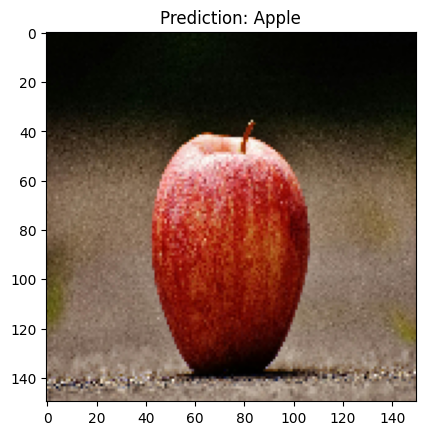

In [33]:
import matplotlib.pyplot as plt

# Show the test image
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.title("Prediction: Orange" if prediction[0][0] > 0.5 else "Prediction: Apple")
plt.show()

11/11 [==============================] - 3s 253ms/step
Classification Report:

              precision    recall  f1-score   support

       Apple       0.70      0.89      0.79       179
      Orange       0.81      0.56      0.66       153

    accuracy                           0.74       332
   macro avg       0.76      0.73      0.72       332
weighted avg       0.75      0.74      0.73       332



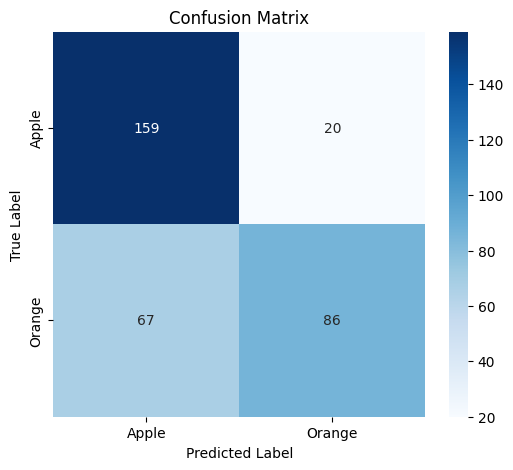

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get true labels and predicted labels
true_labels = test_generator.classes  # Actual labels
predictions = model.predict(test_generator)  # Predictions (probabilities)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convert to 0 or 1

# Class labels mapping
class_labels = list(test_generator.class_indices.keys())  # ['Apple', 'Orange']

# Generate classification report
print("Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Updated

Found directory: /home/nithish/Desktop/Mtech/Deep_Learning/Orange and Apple/Apple vs Orange
Found 267 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 332 images belonging to 2 classes.
Epoch 1/5
9/9 [==============================] - 7s 640ms/step - loss: 0.7334 - accuracy: 0.4719 - val_loss: 0.6986 - val_accuracy: 0.4615
Epoch 2/5
9/9 [==============================] - 5s 599ms/step - loss: 0.6793 - accuracy: 0.5019 - val_loss: 0.6439 - val_accuracy: 0.7385
Epoch 3/5
9/9 [==============================] - 5s 568ms/step - loss: 0.5873 - accuracy: 0.7378 - val_loss: 0.5391 - val_accuracy: 0.7846
Epoch 4/5
9/9 [==============================] - 5s 628ms/step - loss: 0.5413 - accuracy: 0.7416 - val_loss: 0.5368 - val_accuracy: 0.8154
Epoch 5/5
9/9 [==============================] - 5s 587ms/step - loss: 0.5047 - accuracy: 0.7753 - val_loss: 0.4622 - val_accuracy: 0.8000
Found 267 images belonging to 2 classes.
Epoch 1/5
9/9 [==============================] - 5

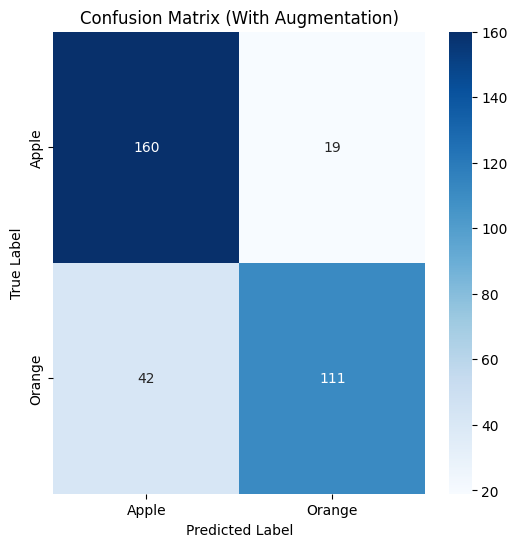

11/11 [==============================] - 3s 255ms/step


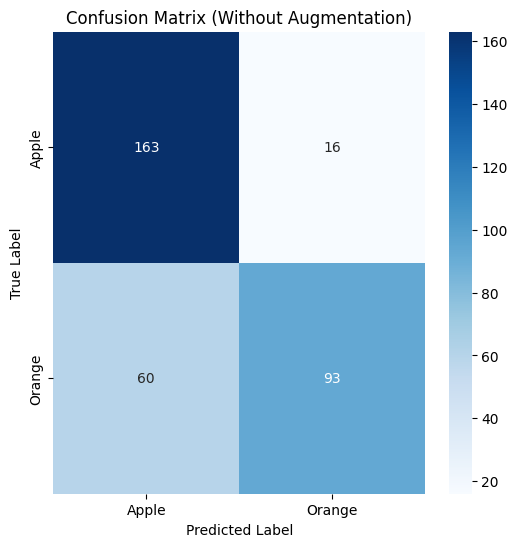

1/1 [==============================] - 0s 208ms/step


TypeError: list indices must be integers or slices, not numpy.float32

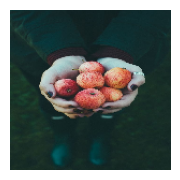

In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

# Dataset Path
dataset_path = "/home/nithish/Desktop/Mtech/Deep_Learning/Orange and Apple/Apple vs Orange"
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

if os.path.exists(dataset_path):
    print(f"Found directory: {dataset_path}")
else:
    print(f"Error: Directory not found: {dataset_path}")

# -------------------------
# DATA AUGMENTATION
# -------------------------
train_datagen_augmented = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation & test (Only Rescaling)
test_valid_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# -------------------------
# LOAD DATASET
# -------------------------
# Train Set (with augmentation)
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training"
)

# Validation Set
valid_generator = test_valid_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="validation"
)

# Test Set (Separate Folder)
test_generator = test_valid_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important for confusion matrix
)

# -------------------------
# CNN MODEL
# -------------------------
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  
    ])

    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Train Model WITH Augmentation
model_aug = create_model()
history_aug = model_aug.fit(
    train_generator_augmented,
    epochs=5,
    validation_data=valid_generator
)

# Train Model WITHOUT Augmentation
train_generator_no_aug = test_valid_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training"
)

model_no_aug = create_model()
history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=5,
    validation_data=valid_generator
)

# -------------------------
# EVALUATE MODEL
# -------------------------
print("\nEvaluating model with Augmentation on test data:")
test_loss_aug, test_acc_aug = model_aug.evaluate(test_generator)
print(f"Test Accuracy (With Augmentation): {test_acc_aug * 100:.2f}%")

print("\nEvaluating model without Augmentation on test data:")
test_loss_no_aug, test_acc_no_aug = model_no_aug.evaluate(test_generator)
print(f"Test Accuracy (Without Augmentation): {test_acc_no_aug * 100:.2f}%")

# -------------------------
# CLASSIFICATION REPORT
# -------------------------
def generate_classification_report(model, test_generator, title):
    # Get true labels
    true_labels = test_generator.classes

    # Get predicted labels
    predictions = model.predict(test_generator)
    pred_labels = (predictions > 0.5).astype(int)

    # Generate classification report
    report = classification_report(true_labels, pred_labels, target_names=test_generator.class_indices.keys())
    print(f"\nClassification Report ({title}):\n")
    print(report)

# Report for Model with Augmentation
generate_classification_report(model_aug, test_generator, "With Augmentation")

# Report for Model without Augmentation
generate_classification_report(model_no_aug, test_generator, "Without Augmentation")

# -------------------------
# CONFUSION MATRIX
# -------------------------
def plot_confusion_matrix(model, test_generator, title):
    true_labels = test_generator.classes
    predictions = model.predict(test_generator)
    pred_labels = (predictions > 0.5).astype(int)

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix ({title})")
    plt.show()

# Confusion Matrix for Model with Augmentation
plot_confusion_matrix(model_aug, test_generator, "With Augmentation")

# Confusion Matrix for Model without Augmentation
plot_confusion_matrix(model_no_aug, test_generator, "Without Augmentation")

# -------------------------
# TEST MULTIPLE IMAGES
# -------------------------
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize

    prediction = model.predict(img_array)
    
    if prediction[0][0] > 0.5:
        print(f"Prediction for {image_path}: It's Orange!")
    else:
        print(f"Prediction for {image_path}: It's Apple!")

import matplotlib.pyplot as plt

# Get a batch of images from the test set
test_images, test_labels = next(iter(test_generator))  # Get one batch

# Make predictions
predictions = model_aug.predict(test_images)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary classes

# Class labels mapping
class_labels = list(test_generator.class_indices.keys())  # ['Apple', 'Orange']

# Plot images with predictions
plt.figure(figsize=(12, 6))
for i in range(min(10, len(test_images))):  # Show first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])  # Show image
    plt.axis('off')

    actual = class_labels[test_labels[i]]  # True label
    predicted = class_labels[predicted_labels[i][0]]  # Predicted label

    color = "green" if actual == predicted else "red"
    plt.title(f"Actual: {actual}\nPredicted: {predicted}", color=color)

plt.show()
